<a href="https://colab.research.google.com/github/lucasprovenzano/PythonForFinances/blob/main/Python_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import plotly.graph_objects as go

In [13]:
# Defining date frame and reading data from Yahoo Finance. 
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

df = web.DataReader('TSLA', 'yahoo', start, end)

In [ ]:
# Writing and reading data in a csv file. 
df.to_csv('filename.csv')
df.read_csv('filename.csv', parse_dates=True, index_col=0)

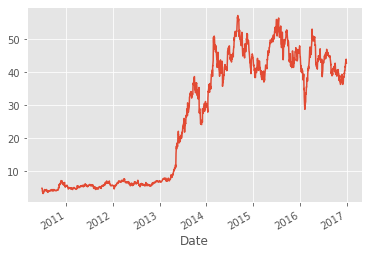

In [14]:
# Plotting the data. 
style.use('ggplot')
df['Adj Close'].plot()

In [18]:
# Calculating Moving Average.
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean() 
print(df.head())

             High    Low   Open  Close    Volume  Adj Close     100ma
Date                                                                 
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778  4.778000
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766  4.772000
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392  4.645333
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840  4.444000
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222  4.199600


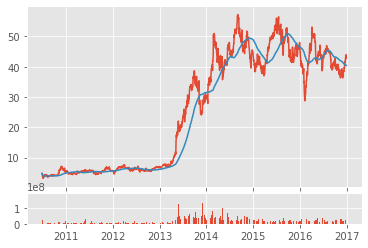

In [21]:
# Adding Volume plot. 
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [34]:
# Resample
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_voulme = df['Volume'].resample('10D').sum()

print(df_ohlc.head())

             open   high    low  close
Date                                  
2010-06-29  4.778  4.778  3.160  3.492
2010-07-09  3.480  4.128  3.410  4.128
2010-07-19  4.382  4.382  4.044  4.144
2010-07-29  4.070  4.390  3.918  3.918
2010-08-08  3.920  3.920  3.520  3.830


In [39]:
# Plotting candle sticks. 
figure = go.Figure(
    data = [
            go.Candlestick(
                x = df.index,
                low = df['Low'],
                high = df['High'],
                close = df['Close'],
                open = df['Open'],
                increasing_line_color = 'green',
                decreasing_line_color = 'red',
            )
    ]
)

figure.update_layout(
    title = 'Tesla Price',
    yaxis_title = 'Tesla Stock Price USD ($)',
    xaxis_title = 'Date'
)

figure.show()